In [1]:
# DSC530-T302
# Stephen Smitshoek
# Week09
# Exercise 12-1

In [2]:
import pandas
import numpy as np
import statsmodels.formula.api as smf

import thinkplot
import thinkstats2
import regression
import timeseries

In [3]:
def group_by_quality_and_day(transactions):
    groups = transactions.groupby('quality')
    dailies = {}
    for name, group in groups:
        dailies[name] = group_by_day(group)
    
    return dailies

In [4]:
def group_by_day(transactions, func=np.mean):
    grouped = transactions[['date', 'ppg']].groupby('date')
    daily = grouped.aggregate(func)
    
    daily['date'] = daily.index
    start = daily.date[0]
    one_year = np.timedelta64(1, 'Y')
    daily['years'] = (daily.date - start) / one_year
    
    return daily

In [5]:
def run_quadratic_model(daily):
    daily['years2'] = daily.years**2
    model = smf.ols('ppg ~ years + years2', data=daily)
    results = model.fit()
    return model, results

In [6]:
transactions = pandas.read_csv('mj-clean.csv', parse_dates=[5])
dailies = group_by_quality_and_day(transactions)
daily = dailies['high']

In [7]:
model, results = run_quadratic_model(daily)
regression.SummarizeResults(results)

Intercept   13.7   (0)
years   -1.12   (5.86e-38)
years2   0.113   (4.82e-07)
R^2 0.4553
Std(ys) 1.096
Std(res) 0.809


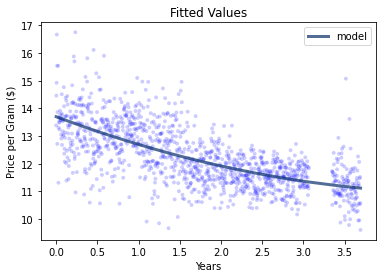

In [8]:
timeseries.PlotFittedValues(model, results)
thinkplot.Config(xlabel='Years', ylabel='Price per Gram ($)', title='Fitted Values')

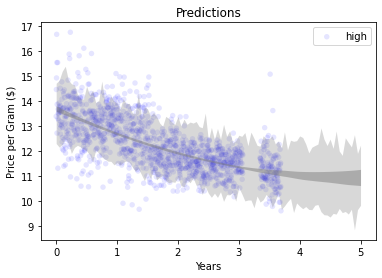

In [9]:
years = np.linspace(0, 5, 101)
thinkplot.Scatter(daily.years, daily.ppg, alpha=0.1, label='high')
timeseries.PlotPredictions(daily, years, func=run_quadratic_model)
thinkplot.Config(xlabel='Years', ylabel='Price per Gram ($)', title='Predictions')